In [1]:
import sys
sys.path.append('../')

from src.data_loader import load_data, full_data_cleaning_pipeline
from src.preprocessing_functions import (
    full_preprocessing_pipeline, 
    advanced_missing_value_handler,
    advanced_feature_engineering,
    smart_encoding,
    feature_scaling,
    create_model_ready_dataset,
    outlier_detection_and_treatment
)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Tüm kütüphaneler başarıyla yüklendi!")

Tüm kütüphaneler başarıyla yüklendi!


In [2]:
print("VERİ YÜKLEME VE HAZIRLIK...")
print("="*50)

try:
    df_from_eda = pd.read_csv('../notebooks/results/cleaned_dataset.csv')
    print("EDA'dan temizlenmiş veri yüklendi!")
    df = df_from_eda.copy()
except FileNotFoundError:
    print("EDA'dan veri bulunamadı, ham veriyi yüklüyoruz...")
    df = load_data('../data/Talent_Academy_Case_DT_2025.xlsx')  
    
    if df is not None:
        print("Veri temizleme işlemi başlatılıyor...")
        df = full_data_cleaning_pipeline(df)

if df is not None:
    print(f"\n Yüklenen veri boyutu: {df.shape}")
    print(f"Sütunlar: {list(df.columns)}")
    print(f"Hedef değişken: TedaviSuresi")
    
    # İlk birkaç satırı göster
    print("\nİlk 5 satır:")
    display(df.head())
    
    # Veri tiplerini göster
    print("\n Veri Tipleri:")
    display(df.dtypes.to_frame('Veri_Tipi'))
else:
    print("Veri yüklenemedi! Lütfen dosya yolunu kontrol edin.")


VERİ YÜKLEME VE HAZIRLIK...
EDA'dan temizlenmiş veri yüklendi!

 Yüklenen veri boyutu: (2235, 17)
Sütunlar: ['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik', 'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi', 'UygulamaYerleri', 'UygulamaSuresi', 'KronikHastalik_Count', 'Alerji_Count', 'Tanilar_Count', 'UygulamaYerleri_Count']
Hedef değişken: TedaviSuresi

İlk 5 satır:


,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi,KronikHastalik_Count,Alerji_Count,Tanilar_Count,UygulamaYerleri_Count
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5.0,Ayak Bileği,20.0,3,1,1,1
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,Boyun,20.0,4,0,4,1
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,"Boyun,Sırt",20.0,4,0,4,2
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,Boyun,5.0,4,0,4,1
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Yok,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15.0,"Boyun,Sırt",20.0,4,0,4,2



 Veri Tipleri:


,Veri_Tipi
HastaNo,int64
Yas,int64
Cinsiyet,object
KanGrubu,object
Uyruk,object
KronikHastalik,object
Bolum,object
Alerji,object
Tanilar,object
TedaviAdi,object


VERİ KALİTESİ KONTROLÜ...
Eksik Değer Durumu:
Hiç eksik değer yok!

 Hedef Değişken (TedaviSuresi) Durumu:
Tip: float64
Sayısal mı: True
Eksik değer: 0
Benzersiz değer: 23
Min-Max: 1.0 - 37.0


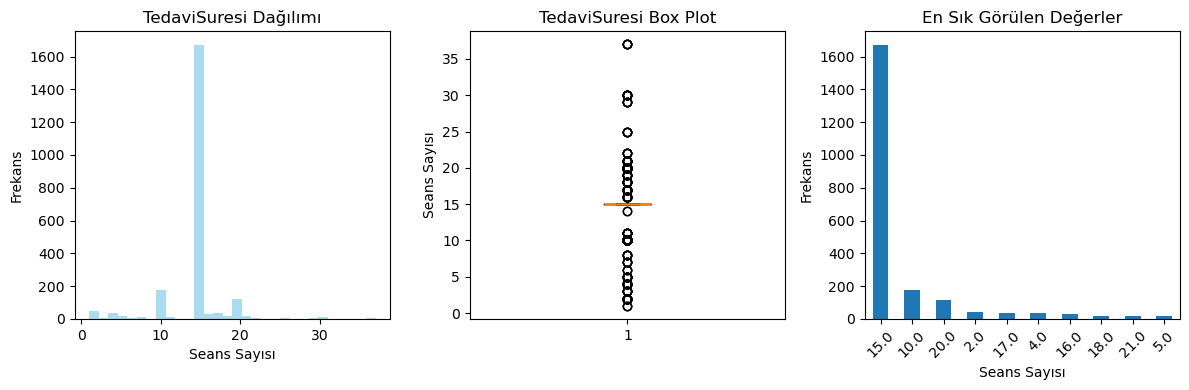

In [3]:
if df is not None:
    print("VERİ KALİTESİ KONTROLÜ...")
    print("="*40)
    
    # Eksik değer durumu
    print("Eksik Değer Durumu:")
    missing_info = df.isnull().sum()
    missing_df = pd.DataFrame({
        'Sütun': missing_info.index,
        'Eksik_Sayısı': missing_info.values,
        'Eksik_Yüzdesi': (missing_info.values / len(df)) * 100
    })
    missing_df = missing_df[missing_df['Eksik_Sayısı'] > 0].sort_values('Eksik_Sayısı', ascending=False)
    
    if len(missing_df) > 0:
        display(missing_df)
    else:
        print("Hiç eksik değer yok!")
    
    # Hedef değişken durumu
    print(f"\n Hedef Değişken (TedaviSuresi) Durumu:")
    if 'TedaviSuresi' in df.columns:
        print(f"Tip: {df['TedaviSuresi'].dtype}")
        print(f"Sayısal mı: {pd.api.types.is_numeric_dtype(df['TedaviSuresi'])}")
        print(f"Eksik değer: {df['TedaviSuresi'].isnull().sum()}")
        print(f"Benzersiz değer: {df['TedaviSuresi'].nunique()}")
        print(f"Min-Max: {df['TedaviSuresi'].min()} - {df['TedaviSuresi'].max()}")
        
        # Hedef değişken dağılımı
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 3, 1)
        plt.hist(df['TedaviSuresi'], bins=30, alpha=0.7, color='skyblue')
        plt.title('TedaviSuresi Dağılımı')
        plt.xlabel('Seans Sayısı')
        plt.ylabel('Frekans')
        
        plt.subplot(1, 3, 2)
        plt.boxplot(df['TedaviSuresi'])
        plt.title('TedaviSuresi Box Plot')
        plt.ylabel('Seans Sayısı')
        
        plt.subplot(1, 3, 3)
        df['TedaviSuresi'].value_counts().head(10).plot(kind='bar')
        plt.title('En Sık Görülen Değerler')
        plt.xlabel('Seans Sayısı')
        plt.ylabel('Frekans')
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.show()
    else:
        print("TedaviSuresi sütunu bulunamadı!")


In [4]:
if df is not None:
    
    # Orijinal veriyi koru
    df_original = df.copy()
    
    # ADIM 1: Eksik Değer İşleme
    df_step1 = advanced_missing_value_handler(df_original)
    
    print(f"\nÖncesi: {df_original.shape}")
    print(f"Sonrası: {df_step1.shape}")
    print(f"Eksik değer kaldı mı: {df_step1.isnull().sum().sum()}")

Eksik veri analizi...
Eksik Değer Durumu:
------------------------------

 Sayısal sütunlar için KNN imputation: ['Yas', 'UygulamaSuresi', 'KronikHastalik_Count', 'Alerji_Count', 'Tanilar_Count', 'UygulamaYerleri_Count']
Sayısal değişkenler KNN ile dolduruldu

Öncesi: (2235, 17)
Sonrası: (2235, 17)
Eksik değer kaldı mı: 0


In [5]:
# Küçük bir veri setine sahip olduğumuz için aykırı değerlere dokunmamaya karar verdim.
#if 'df_step1' in locals():

    # ADIM 2: Aykırı değer temizleme
    # df_step2,outlier_info = outlier_detection_and_treatment(df_step1)
    

In [6]:
if 'df_step1' in locals():
    df_step2 = advanced_feature_engineering(df_step1)
    
    print(f"\nÖncesi: {df_step1.shape}")
    print(f"Sonrası: {df_step2.shape}")
    print(f"Eklenen özellik sayısı: {len(df_step2.columns) - len(df_step1.columns)}")
    
    # Yeni oluşturulan özellikleri göster
    new_features = [col for col in df_step2.columns if col not in df_step1.columns]
    print(f"\nYeni Oluşturulan Özellikler ({len(new_features)} adet):")
    for i, feature in enumerate(new_features, 1):
        print(f"{i:2d}. {feature}")
        
    # Yeni özelliklerin dağılımını göster
    if len(new_features) > 0:
        categorical_new = [col for col in new_features if df_step2[col].dtype == 'object']
        numerical_new = [col for col in new_features if df_step2[col].dtype in ['int64', 'float64']]
        
        if len(numerical_new) > 0:
            print(f"\nYeni Sayısal Özelliklerin İstatistikleri:")
            display(df_step2[numerical_new].describe())


 ÖZELLİK MÜHENDİSLİĞİ...
 Yaş bazlı özellikler oluşturuluyor...
 Yaş grupları: {'Yetişkin': 798, 'Orta_Yaş': 782, 'Yaşlı': 346, 'Genç_Yetişkin': 145, 'İleri_Yaş': 93, 'Çocuk': 71}

 Tedavi süresi bazlı özellikler oluşturuluyor...
 Tedavi kategorileri: {'Uzun': 1911, 'Orta': 197, 'Kısa': 62, 'Çok_Kısa': 48, 'Çok_Uzun': 17}

 KronikHastalik için özellikler oluşturuluyor...
 KronikHastalik için 3 yeni özellik oluşturuldu

 Alerji için özellikler oluşturuluyor...
 Alerji için 3 yeni özellik oluşturuldu

 Tanilar için özellikler oluşturuluyor...
 Tanilar için 3 yeni özellik oluşturuldu

 Kombinasyon özellikleri oluşturuluyor...
 Toplam sağlık sorunu özelliği oluşturuldu
 Yüksek riskli hasta özelliği oluşturuldu

 Toplam 16 yeni özellik oluşturuldu!

Öncesi: (2235, 17)
Sonrası: (2235, 33)
Eklenen özellik sayısı: 16

Yeni Oluşturulan Özellikler (16 adet):
 1. Yas_Grubu
 2. Yasli_Mi
 3. Cocuk_Mu
 4. Tedavi_Kategori
 5. Uzun_Tedavi
 6. KronikHastalik_Var
 7. KronikHastalik_Sayisi
 8. KronikHas

,Yasli_Mi,Cocuk_Mu,Uzun_Tedavi,KronikHastalik_Var,KronikHastalik_Sayisi,KronikHastalik_Uzunluk,Alerji_Var,Alerji_Sayisi,Alerji_Uzunluk,Tanilar_Var,Tanilar_Sayisi,Tanilar_Uzunluk,Toplam_Saglik_Sorunu,Yuksek_Riskli
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,0.145861,0.031767,0.862640,0.726622,1.870246,33.208501,0.577629,0.720358,5.676510,0.966443,2.501566,43.512752,5.092170,0.766890
std,0.353046,0.175419,0.344304,0.445793,1.500578,27.532441,0.494048,0.697939,4.098885,0.180126,1.673527,29.431714,2.224126,0.422906
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,1.000000,1.000000,23.000000,4.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000,2.000000,29.000000,1.000000,1.000000,3.000000,1.000000,2.000000,37.000000,5.000000,1.000000
75%,0.000000,0.000000,1.000000,1.000000,3.000000,57.000000,1.000000,1.000000,6.000000,1.000000,3.000000,56.000000,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,4.000000,105.000000,1.000000,2.000000,17.000000,1.000000,13.000000,296.000000,15.000000,1.000000


In [7]:
if 'df_step2' in locals():
    print("\n KATEGORİK KODLAMA:")
    df_step3, encoding_info = smart_encoding(df_step2)
    
    print(f"\nÖncesi: {df_step2.shape}")
    print(f"Sonrası: {df_step3.shape}")
    
    # Kodlama bilgilerini göster
    print(f"\n Kodlama Özeti:")
    for col, info in encoding_info.items():
        print(f"• {col}: {info['type']} kodlama")
    
    # Kodlanmış sütunları göster
    encoded_cols = [col for col in df_step3.columns if '_encoded' in col or col.startswith(tuple(encoding_info.keys()))]
    print(f"\nKodlanmış Sütun Sayısı: {len(encoded_cols)}")


 KATEGORİK KODLAMA:

 AKILLI KATEGORİK KODLAMA...

 Cinsiyet - Benzersiz değer: 3
One-Hot Encoding

 KanGrubu - Benzersiz değer: 9
One-Hot Encoding

 Uyruk - Benzersiz değer: 5
One-Hot Encoding

 KronikHastalik - Benzersiz değer: 221
Frequency + Top Categories Encoding

 Bolum - Benzersiz değer: 11
Frequency + Top Categories Encoding

 Alerji - Benzersiz değer: 39
Frequency + Top Categories Encoding

 Tanilar - Benzersiz değer: 348
Frequency + Top Categories Encoding

 TedaviAdi - Benzersiz değer: 244
Frequency + Top Categories Encoding

 UygulamaYerleri - Benzersiz değer: 38
Frequency + Top Categories Encoding

 Yas_Grubu - Benzersiz değer: 6
One-Hot Encoding

 Tedavi_Kategori - Benzersiz değer: 5
One-Hot Encoding

 11 kategorik değişken kodlandı!

Öncesi: (2235, 33)
Sonrası: (2235, 134)

 Kodlama Özeti:
• Cinsiyet: onehot kodlama
• KanGrubu: onehot kodlama
• Uyruk: onehot kodlama
• KronikHastalik: frequency_top kodlama
• Bolum: frequency_top kodlama
• Alerji: frequency_top kodlama
•

In [8]:
if 'df_step3' in locals():
    print("\n ÖZELLİK ÖLÇEKLENDİRME:")
    df_step4, scaler = feature_scaling(df_step3, target_col='TedaviSuresi', scaling_method='standard')
    
    # Ölçeklendirme öncesi ve sonrası karşılaştırma
    numerical_cols = df_step4.select_dtypes(include=[np.number]).columns.tolist()
    if 'TedaviSuresi' in numerical_cols:
        numerical_cols.remove('TedaviSuresi')
        
    if 'HastaNo' in numerical_cols:
        numerical_cols.remove('HastaNo')
    
    
    if len(numerical_cols) > 0:
        sample_cols = numerical_cols[:3]  
        
        print(f"\n Örnek Sütunlar İçin Ölçeklendirme Karşılaştırması:")
        comparison_df = pd.DataFrame({
            'Sütun': sample_cols,
            'Öncesi_Ortalama': [df_step3[col].mean() for col in sample_cols],
            'Sonrası_Ortalama': [df_step4[col].mean() for col in sample_cols],
            'Öncesi_Std': [df_step3[col].std() for col in sample_cols],
            'Sonrası_Std': [df_step4[col].std() for col in sample_cols]
        })
        display(comparison_df)


 ÖZELLİK ÖLÇEKLENDİRME:

 ÖZELLİK ÖLÇEKLENDİRME (STANDARD)...
 Ölçeklendirilecek sütunlar: ['Yas', 'UygulamaSuresi', 'KronikHastalik_Count', 'Alerji_Count', 'Tanilar_Count', 'UygulamaYerleri_Count', 'Uzun_Tedavi', 'KronikHastalik_Sayisi', 'KronikHastalik_Uzunluk', 'Alerji_Sayisi', 'Alerji_Uzunluk', 'Tanilar_Sayisi', 'Tanilar_Uzunluk', 'Toplam_Saglik_Sorunu', 'Yuksek_Riskli', 'KronikHastalik_frequency', 'KronikHastalik_is_top', 'Bolum_frequency', 'Bolum_is_top', 'Alerji_frequency', 'Alerji_is_top', 'Tanilar_frequency', 'Tanilar_is_top', 'TedaviAdi_frequency', 'TedaviAdi_is_top', 'UygulamaYerleri_frequency', 'UygulamaYerleri_is_top']
 27 özellik standard scaler ile ölçeklendirildi!

Ölçeklendirme Sonrası İstatistikler:
Ortalama: -0.000
Standart sapma: 1.000

 Örnek Sütunlar İçin Ölçeklendirme Karşılaştırması:


,Sütun,Öncesi_Ortalama,Sonrası_Ortalama,Öncesi_Std,Sonrası_Std
0,Yas,47.327069,-1.525998e-16,15.208634,1.000224
1,UygulamaSuresi,16.573154,-1.422675e-16,6.268635,1.000224
2,KronikHastalik_Count,1.870246,7.947905e-18,1.500578,1.000224


In [9]:
if 'df_step4' in locals():
    print("\nVERİ SETİ OLUŞTURMA:")
    X_train, X_test, y_train, y_test, feature_columns = create_model_ready_dataset(
        df_step4, target_col='TedaviSuresi', test_size=0.2
    )
    
    # Veri setleri hakkında bilgi
    print(f"\n Final Veri Setleri:")
    print(f"X_train: {X_train.shape}")
    print(f"X_test: {X_test.shape}")  
    print(f"y_train: {y_train.shape}")
    print(f"y_test: {y_test.shape}")
    print(f"Toplam özellik sayısı: {len(feature_columns)}")
    
    # Hedef değişken istatistikleri
    print(f"\n Hedef Değişken İstatistikleri:")
    stats_df = pd.DataFrame({
        'Set': ['Eğitim', 'Test', 'Toplam'],
        'Ortalama': [y_train.mean(), y_test.mean(), df_step4['TedaviSuresi'].mean()],
        'Std': [y_train.std(), y_test.std(), df_step4['TedaviSuresi'].std()],
        'Min': [y_train.min(), y_test.min(), df_step4['TedaviSuresi'].min()],
        'Max': [y_train.max(), y_test.max(), df_step4['TedaviSuresi'].max()]
    })
    display(stats_df)


VERİ SETİ OLUŞTURMA:

 MODEL-READY VERİ SETİ OLUŞTURULUYOR...
Özellik sayısı: 32
Hedef değişken: TedaviSuresi
Eğitim seti: (1788, 32)
Test seti: (447, 32)

 Hedef Değişken İstatistikleri:
Eğitim - Ortalama: 14.53, Std: 3.68
Test - Ortalama: 14.72, Std: 3.92

 Final Veri Setleri:
X_train: (1788, 32)
X_test: (447, 32)
y_train: (1788,)
y_test: (447,)
Toplam özellik sayısı: 32

 Hedef Değişken İstatistikleri:


,Set,Ortalama,Std,Min,Max
0,Eğitim,14.532998,3.675343,1.0,37.0
1,Test,14.722595,3.919482,1.0,37.0
2,Toplam,14.570917,3.725322,1.0,37.0


In [10]:
import os
os.makedirs('../results', exist_ok=True)

if 'X_train' in locals():
    # Model-ready veri setlerini kaydet
    X_train.to_csv('../results/X_train.csv', index=False)
    X_test.to_csv('../results/X_test.csv', index=False)
    pd.DataFrame({'TedaviSuresi': y_train}).to_csv('../results/y_train.csv', index=False)
    pd.DataFrame({'TedaviSuresi': y_test}).to_csv('../results/y_test.csv', index=False)
    
    # Tam işlenmiş veriyi kaydet
    df_step4.to_csv('../results/full_preprocessed_data.csv', index=False)
    
    # Özellik listesini kaydet
    pd.DataFrame({'Feature': feature_columns}).to_csv('../results/feature_list.csv', index=False)
    
    print("SONUÇLAR KAYDEDİLDİ!")
    print("="*40)
    print("Kaydedilen dosyalar:")
    print("X_train.csv - Eğitim özellikleri")
    print("X_test.csv - Test özellikleri") 
    print("y_train.csv - Eğitim hedef değişkeni")
    print("y_test.csv - Test hedef değişkeni")
    print("full_preprocessed_data.csv - Tam işlenmiş veri")
    print("feature_list.csv - Özellik listesi")

#

SONUÇLAR KAYDEDİLDİ!
Kaydedilen dosyalar:
X_train.csv - Eğitim özellikleri
X_test.csv - Test özellikleri
y_train.csv - Eğitim hedef değişkeni
y_test.csv - Test hedef değişkeni
full_preprocessed_data.csv - Tam işlenmiş veri
feature_list.csv - Özellik listesi


In [11]:
print("\n VERİ ÖN İŞLEME TAMAMLANDI!")
print("="*60)

if 'X_train' in locals():
    print("ÖN İŞLEME ÖZETİ:")
    print(f"Başlangıç veri boyutu: {df_original.shape}")
    print(f"Final veri boyutu: {df_step4.shape}")
    print(f"Model özellikleri: {len(feature_columns)}")
    print(f"Eğitim seti: {X_train.shape[0]} satır")
    print(f"Test seti: {X_test.shape[0]} satır")
    
    print(f"\nHEDEF DEĞİŞKEN ÖZETİ:")
    print(f"Ortalama tedavi süresi: {df_step4['TedaviSuresi'].mean():.1f} seans")
    print(f"En kısa tedavi: {df_step4['TedaviSuresi'].min()} seans")
    print(f"En uzun tedavi: {df_step4['TedaviSuresi'].max()} seans")
    print(f"Standart sapma: {df_step4['TedaviSuresi'].std():.1f}")
    
    print("Veri ön işleme tamamlandı")    


 VERİ ÖN İŞLEME TAMAMLANDI!
ÖN İŞLEME ÖZETİ:
Başlangıç veri boyutu: (2235, 17)
Final veri boyutu: (2235, 134)
Model özellikleri: 32
Eğitim seti: 1788 satır
Test seti: 447 satır

HEDEF DEĞİŞKEN ÖZETİ:
Ortalama tedavi süresi: 14.6 seans
En kısa tedavi: 1.0 seans
En uzun tedavi: 37.0 seans
Standart sapma: 3.7
Veri ön işleme tamamlandı
